In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform (X_train)

df_valid = pd.read_csv('./processed_data/df_valid.csv')
X_valid = df_valid.drop('label', axis=1)
X_valid_norm = norm.transform(X_valid)
y_valid = df_valid['label']

df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
X_test_norm = norm.transform(X_test)
y_test = df_test['label']

In [2]:
df_train

,Unnamed: 0,let,>,s,with,true,auto,<,function,24,...,include,id,amp,.,for,quot,version,org,const,label
0,0,0,58,1,2,1,23,38,0,0,...,15,0,0,130,7,0,0,0,10,.cpp
1,0,0,5,0,2,0,0,4,0,0,...,4,0,0,12,0,0,0,0,0,.cpp
2,0,0,27,0,1,2,0,22,0,0,...,9,0,0,112,2,0,0,7,0,.java
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,.py
4,0,0,45,1,6,0,0,29,0,2,...,12,0,0,53,11,0,1,0,23,.c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,0,0,20,0,1,0,0,2,1,0,...,2,0,0,15,1,0,1,0,5,.c
12596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13,4,0,1,0,0,.rb
12597,0,0,7,0,0,0,0,7,0,0,...,0,0,0,11,1,0,0,0,0,.html
12598,0,0,12,0,1,0,0,17,2,0,...,4,0,0,5,17,0,0,0,0,.c


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

In [4]:
print(X_train_norm.shape, y_train.shape)
print(X_valid_norm.shape, y_valid.shape)
print(X_test_norm.shape, y_test.shape)

(12600, 109) (12600,)
(4200, 109) (4200,)
(4200, 109) (4200,)


In [5]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation='elu', input_shape=(108,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(25, activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation='softmax')
])

In [42]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    mode="min",
    restore_best_weights=True)

history = model.fit(X_train_norm, y_train, epochs=300, 
                    validation_data=(X_valid_norm, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

# history = model.fit(X_train_norm, y_train, epochs=300, validation_data=(X_valid_norm, y_valid), callbacks=[checkpoint_cb])

# model = keras.models.load_model("my_keras_model.h5")

Epoch 1/300
394/394 [==============================] - 1s 1ms/step - loss: 1.4804 - accuracy: 0.4875 - val_loss: 1.6188 - val_accuracy: 0.3586
Epoch 2/300
394/394 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.8039 - val_loss: 0.5374 - val_accuracy: 0.8500
Epoch 3/300
394/394 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.8469 - val_loss: 0.4408 - val_accuracy: 0.8776
Epoch 4/300
394/394 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8666 - val_loss: 0.3331 - val_accuracy: 0.9155
Epoch 5/300
394/394 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8911 - val_loss: 0.3015 - val_accuracy: 0.9257
Epoch 6/300
394/394 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8974 - val_loss: 0.2615 - val_accuracy: 0.9364
Epoch 7/300
394/394 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.9063 - val_loss: 0.2677 - val_accuracy: 0.9162

Epoch 58/300
394/394 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9652 - val_loss: 0.1395 - val_accuracy: 0.9660
Epoch 59/300
394/394 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9636 - val_loss: 0.1438 - val_accuracy: 0.9621
Epoch 60/300
394/394 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9667 - val_loss: 0.1601 - val_accuracy: 0.9619
Epoch 61/300
394/394 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9663 - val_loss: 0.1328 - val_accuracy: 0.9667
Epoch 62/300
394/394 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9679 - val_loss: 0.1679 - val_accuracy: 0.9536
Epoch 63/300
394/394 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9676 - val_loss: 0.1378 - val_accuracy: 0.9662
Epoch 64/300
394/394 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9670 - val_loss: 0.3387 - val_accuracy:

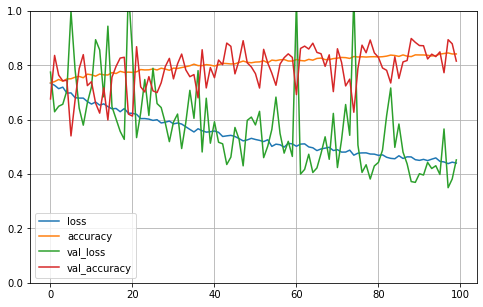

In [11]:
# with no unique df
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

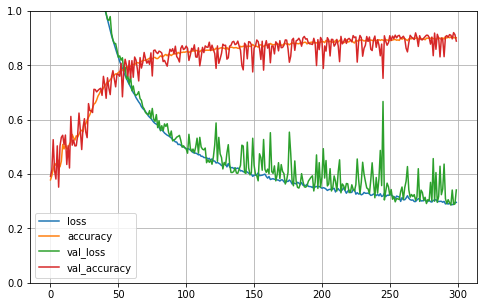

In [13]:
# with the unique df
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

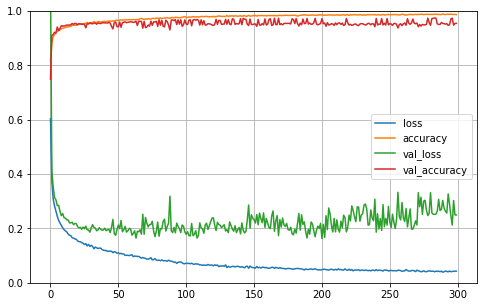

In [10]:
# added BN before each layer
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Val loss seems to be increasing so try early stopping

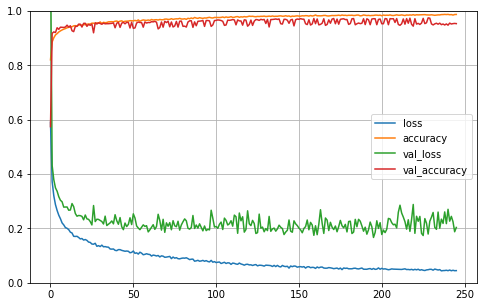

In [9]:
# Implemented Early Stopping (callbacks and early stopping)
# early_stopping_cb = keras.callbacks.EarlyStopping(
#    monitor="val_loss",
#    patience=50,
#    mode="min",
#    restore_best_weights=True)
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Val loss still considerably higher than loss and doesn't decrease with loss -> try reducing one layer?

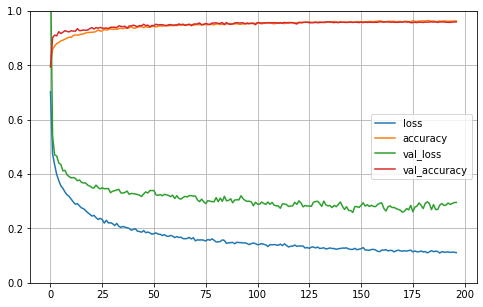

In [9]:
# reduce one layer
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# I GIVE UP

jk possibly try dropout and stuff

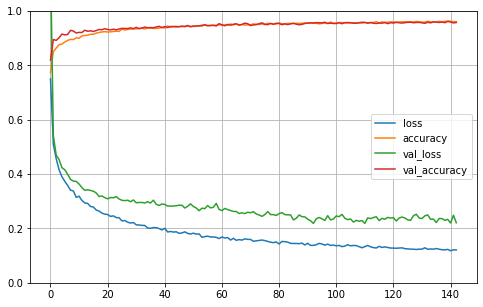

In [14]:
# reduce neurons to 200
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

some how better

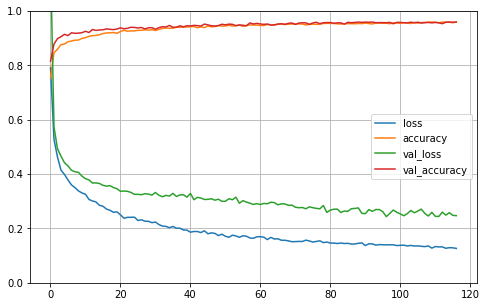

In [20]:
# smaller patience
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

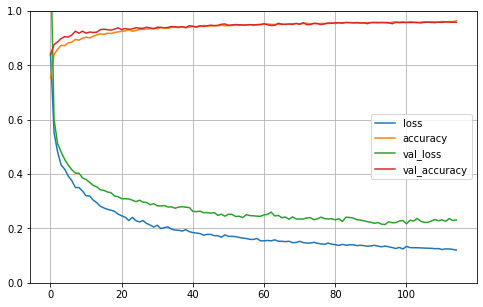

In [24]:
# reduce neurons to 100
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

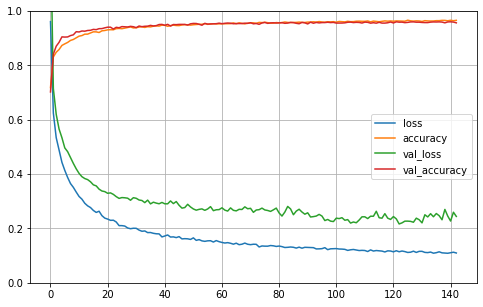

In [28]:
# reduce neurons to 50
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

50 neurons seem to do as well as 100

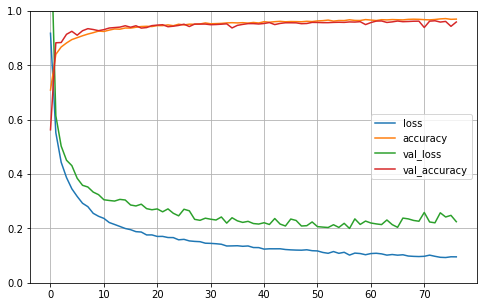

In [32]:
# added a layer of 25 neurons
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

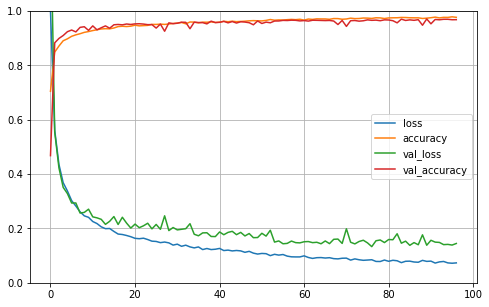

In [36]:
# added a layer of 10 neurons
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

val_loss seems to have decreased